This is to help with creating a function that returns a preprocessed dataset. Specifically the onset of the reaction interval or maximum rate of reaction interval.

From what I read, it is defined as the steepest slope in the graph. It isn't very rigorous and I personally dont see how we can use this to minimize the time it takes to synthesize a given substance, but that is unrelated right now.<p>
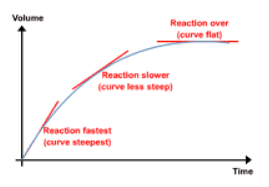
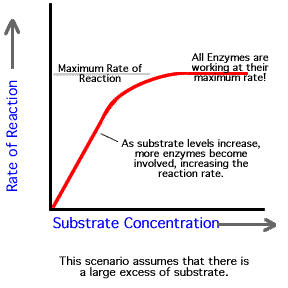<p>
In the excel file we saw each sample have the same interval. This is probably since most graphs had a linear yield and they generalized it to work for the few that weren't linear.<p>
We will assume that changing the amount we use per ingredient will lead to a different reaction vs. time graph. From small reading, I found that we can expect the graph to be linear, exponential, sigmoidal or logarithmic.
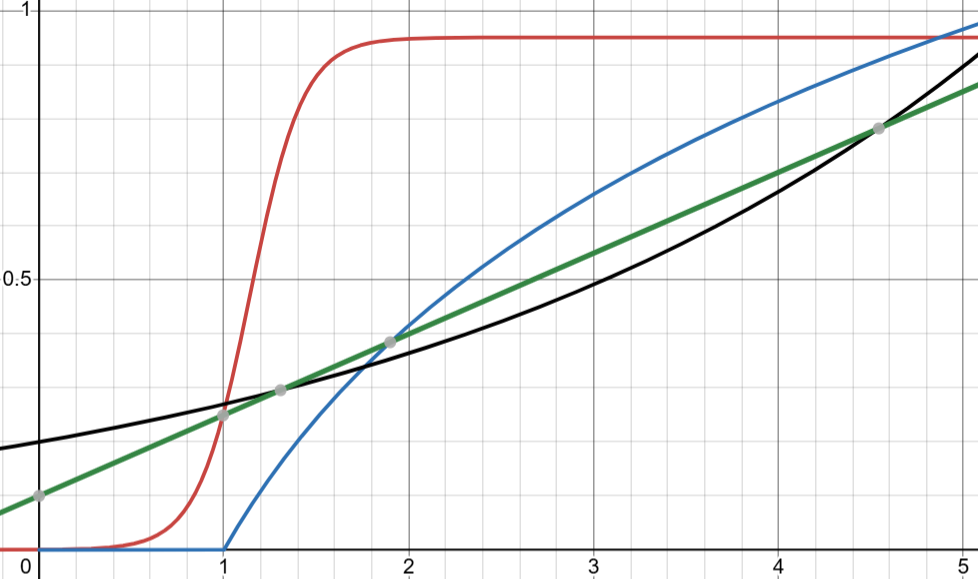<p>
To visualize what I was suggesting with the assumption we make, you can look at `solution_space_substance.ipynb` (really recommended). It outputs the following graph:
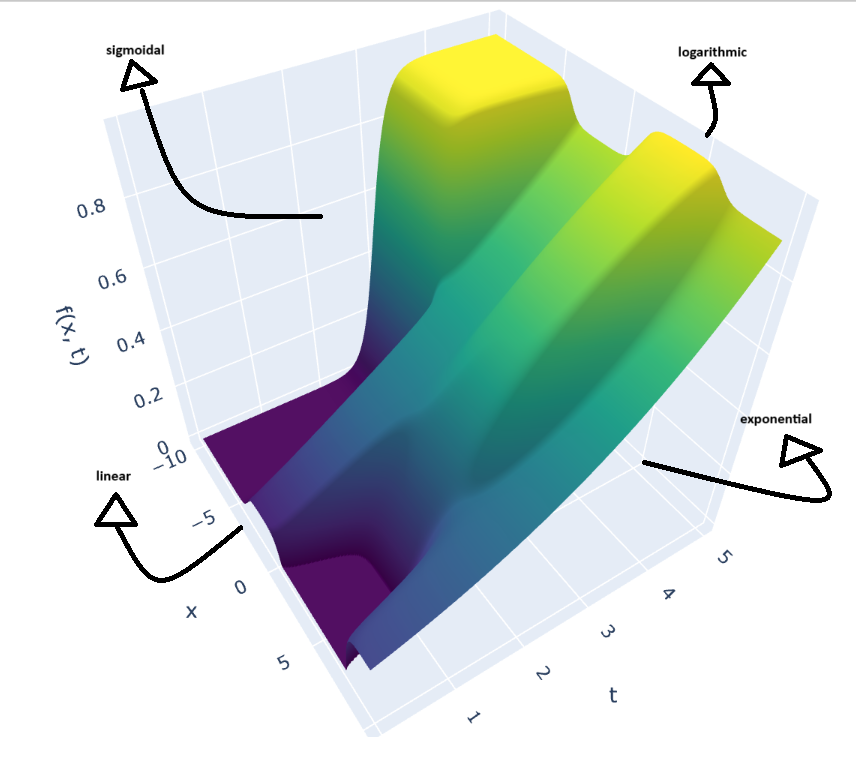<p>
Anyway with the following code I find the steepest slope in the graph and get the average slope of the interval surrounding the steepest slope.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.isotonic import IsotonicRegression
from data_generation import sigmoid_fn, linear_fn, exp_fn, log_fn, yield_time_x, neg_exp_fn
from bayesian_opt import preprocessor, least_squares_fitter

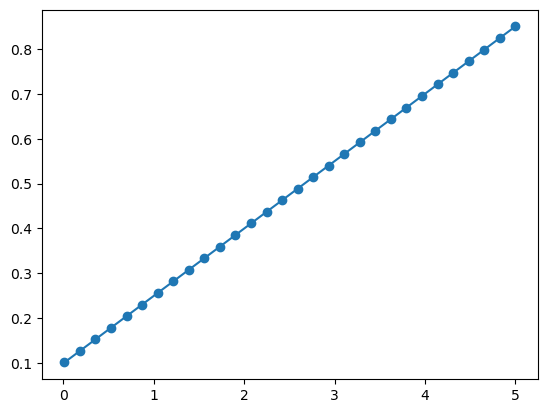

In [32]:
t_vals = np.linspace(0.01, 5, 30)
y_vals = linear_fn(t_vals, 0.15, 0.1)
plt.plot(t_vals, y_vals)
plt.scatter(t_vals, y_vals)

Application

In [2]:
raw_df = pd.read_excel('internship_simplified.xlsx',sheet_name='Sheet1')
settings_df = pd.read_excel('internship_simplified.xlsx',sheet_name='Sheet2')


In [3]:
df = preprocessor(settings_df,raw_df, ['G6','G9'], plot=True)
a = np.where(df['function_type'] != 'linear')
df.iloc[a[0]]

,pH,c1,c2,sigmoid_a,sigmoid_b,sigmoid_c,linear_a,linear_b,exp_a,exp_b,neg_exp_a,neg_exp_b,neg_exp_c,neg_exp_d,norm_yield_grad,max_yield,function_type
7,5.598,0.486,1.222,0.0,0.0,0.0,0.0,0.0,0.000033,0.071668,0.0,0.0,0.0,0.0,0.098214,0.0859,exp
12,6.202,0.421,0.538,0.0,0.0,0.0,0.0,0.0,0.000026,0.073279,0.0,0.0,0.0,0.0,0.071429,0.0849,exp
34,4.984,0.521,1.546,0.0,0.0,0.0,0.0,0.0,0.000090,0.078885,0.0,0.0,0.0,0.0,0.791667,0.1273,exp
51,5.554,0.418,0.050,0.0,0.0,0.0,0.0,0.0,0.000037,0.069641,0.0,0.0,0.0,0.0,0.071429,0.0853,exp
75,5.102,0.592,1.908,0.0,0.0,0.0,0.0,0.0,0.000035,0.079850,0.0,0.0,0.0,0.0,0.071429,0.0971,exp
78,5.224,0.702,0.516,0.0,0.0,0.0,0.0,0.0,0.000031,0.080945,0.0,0.0,0.0,0.0,0.160714,0.0961,exp
85,5.896,0.116,0.044,0.0,0.0,0.0,0.0,0.0,0.000016,0.070735,0.0,0.0,0.0,0.0,0.066964,0.0776,exp


Testing quality of method.

We generate 1000 of each function type and see how often we misclassify and how accurate our models are.

In [4]:
max(raw_df['Time'].apply(lambda t: (t.hour * 3600 + t.minute * 60 + t.second)).to_numpy())
len(raw_df['Time'].apply(lambda t: (t.hour * 3600 + t.minute * 60 + t.second)).to_numpy())

93

In [5]:
a_sig = np.random.uniform(0.1, 1)
b_sig, c_sig = np.random.uniform(0.1, 5, 2)

a_lin = np.random.uniform(0.1, 5)
b_lin = np.random.uniform(-5, 5)

a_exp, b_exp = np.random.uniform(0, 5, 2)

a_neg = np.random.uniform(0.3, 1)
b_neg = np.random.uniform(0.1, 5)
c_neg = np.random.uniform(-5, 5)
d_neg = np.random.uniform(0.1, 0.4)

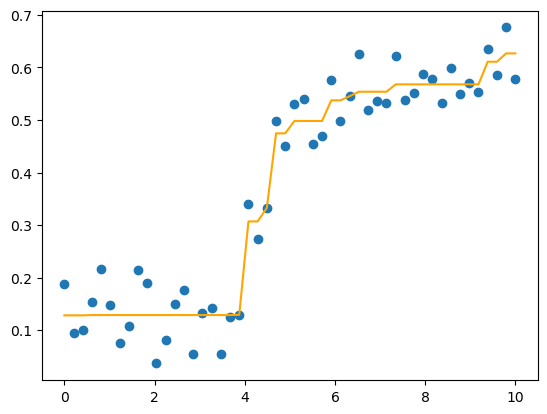

In [77]:
t_vals = np.linspace(0,10,50) 
noise = np.random.uniform(-0.1, 0.1, 50)
y_vals_sig = sigmoid_fn(t_vals, a_sig, b_sig, c_sig)
y_vals_lin = linear_fn(t_vals, a_lin, b_lin)
y_vals_exp = exp_fn(t_vals, a_exp, b_exp)
y_vals_neg = neg_exp_fn(t_vals, a_neg, b_neg, c_neg, d_neg)

ir = IsotonicRegression(increasing=True)
iso_fit = ir.fit_transform(t_vals, y_vals_neg + noise)

plt.plot(t_vals, iso_fit, color='orange')
plt.scatter(t_vals, y_vals_neg+ noise)

In [18]:
pre_list.index('linear')

1

In [19]:
np.random.seed(42)

params_indices = {'sigmoid': [0, 1, 2],
        'linear': [3, 4],
        'exp': [5, -5],
        'neg exp': [-4, -3, -2, -1]}
params_functs = {'sigmoid': sigmoid_fn,
        'linear': linear_fn,
        'exp': exp_fn,
        'neg exp': neg_exp_fn}


t_vals = np.linspace(0,10,100) 
best_fits = []
all_params_lite = []
incorrects = []
true_y = []
all_scores = []
pre_list = ['sigmoid', 'linear', 'exp', 'neg exp']

for iter in range(1000):
    noise = np.random.uniform(-0.1, 0.1, 100)
    
    a_sig = np.random.uniform(0.1, 1)
    b_sig, c_sig = np.random.uniform(0.1, 5, 2)

    a_lin = np.random.uniform(0.1, 5)
    b_lin = np.random.uniform(-5, 5)

    a_exp, b_exp = np.random.uniform(0, 5, 2)

    a_neg = np.random.uniform(0.3, 1)
    b_neg = np.random.uniform(0.1, 5)
    c_neg = np.random.uniform(0.5, 5)
    d_neg = np.random.uniform(0.1, 0.4)

    t_vals = np.linspace(0,10,100) 
    y_vals_sig = sigmoid_fn(t_vals, a_sig, b_sig, c_sig)
    y_vals_lin = linear_fn(t_vals, a_lin, b_lin)
    y_vals_exp = exp_fn(t_vals, a_exp, b_exp)
    y_vals_neg = neg_exp_fn(t_vals, a_neg, b_neg, c_neg, d_neg)
    no_noise = [y_vals_sig, y_vals_lin, y_vals_exp, y_vals_neg]

    y_vals_sig_n = noise + y_vals_sig
    y_vals_lin_n = noise + y_vals_lin
    y_vals_exp_n = noise + y_vals_exp
    y_vals_neg_n = noise + y_vals_neg

    count = 0
    for y in [y_vals_sig_n, y_vals_lin_n, y_vals_exp_n, y_vals_neg_n]:

        ir = IsotonicRegression(increasing=True)
        iso_fit = ir.fit_transform(t_vals, y)
        params, scores = least_squares_fitter(t_vals, iso_fit)
        best_fit = list(params.keys())[np.argmax(scores)]
        best_fits.append(best_fit)
        true_y.append(pre_list[count])
        all_params_lite.append(params[best_fit])
        all_scores.append(scores[pre_list.index(best_fit)])

        if pre_list[count] != best_fit:
            funct_fit = params_functs[best_fit](t_vals, *params[best_fit])
            incorrects.append([iso_fit, y, funct_fit, no_noise[count], pre_list[count], best_fit])

        count+=1

    


c:\Users\danin\Downloads\ict-f0ntys-internship\data_generation.py:13: RuntimeWarning: overflow encountered in exp
  f = a * (1 - np.exp(-b * t + b * c))
c:\Users\danin\Downloads\ict-f0ntys-internship\data_generation.py:13: RuntimeWarning: overflow encountered in multiply
  f = a * (1 - np.exp(-b * t + b * c))
c:\Users\danin\Downloads\ict-f0ntys-internship\data_generation.py:13: RuntimeWarning: overflow encountered in exp
  f = a * (1 - np.exp(-b * t + b * c))
c:\Users\danin\Downloads\ict-f0ntys-internship\data_generation.py:13: RuntimeWarning: overflow encountered in exp
  f = a * (1 - np.exp(-b * t + b * c))
c:\Users\danin\Downloads\ict-f0ntys-internship\data_generation.py:13: RuntimeWarning: overflow encountered in multiply
  f = a * (1 - np.exp(-b * t + b * c))
c:\Users\danin\Downloads\ict-f0ntys-internship\data_generation.py:13: RuntimeWarning: overflow encountered in exp
  f = a * (1 - np.exp(-b * t + b * c))
c:\Users\danin\Downloads\ict-f0ntys-internship\data_generation.py:13: Ru

['neg exp', 'linear']

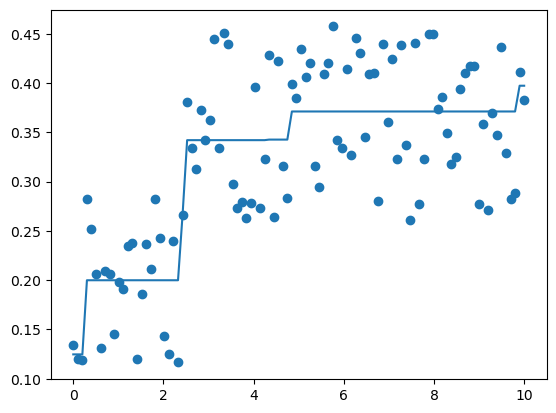

In [ ]:
plt.plot(t_vals, incorrects[6][0])
plt.plot(t_vals, incorrects[6][1])
#plt.plot(t_vals, incorrects[6][2])
#plt.plot(t_vals, incorrects[6][3])
incorrects[6][-2:]

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

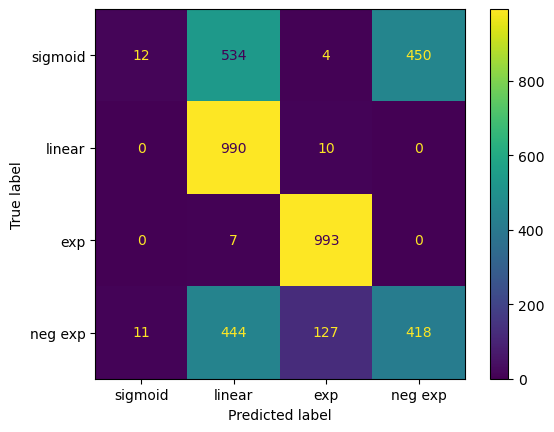

In [53]:
conf_matrix = confusion_matrix(true_y, best_fits, labels=pre_list)
ConfusionMatrixDisplay(conf_matrix, display_labels=pre_list).plot()

In [52]:
np.shape(np.where((true_y == 'sigmoid') & (best_fits == 'linear')))

(1, 534)

C:\Users\danin\AppData\Local\Temp\ipykernel_27928\1113376686.py:6: RuntimeWarning: Mean of empty slice.
  avg_score = all_scores[indices].mean()


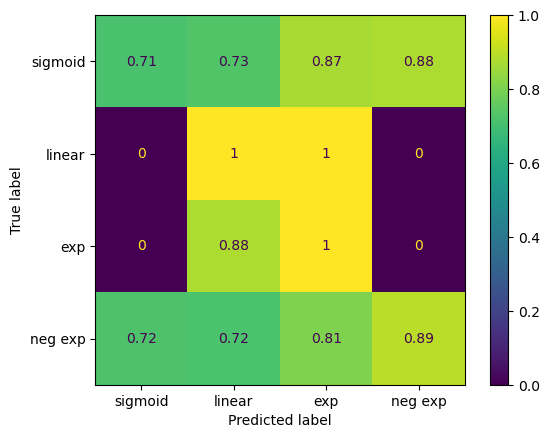

In [65]:
true_y, best_fits, all_scores = np.array(true_y), np.array(best_fits), np.array(all_scores)
scores_matrix = np.zeros((4,4))
for first in range(4):
    for second in range(4):
        indices = np.where((true_y == pre_list[first]) & (best_fits == pre_list[second]))[0]
        avg_score = all_scores[indices].mean()
        if avg_score >= 0:
            scores_matrix[first, second] = avg_score
        else:
            scores_matrix[first, second] = 0


ConfusionMatrixDisplay(scores_matrix, display_labels=pre_list).plot()